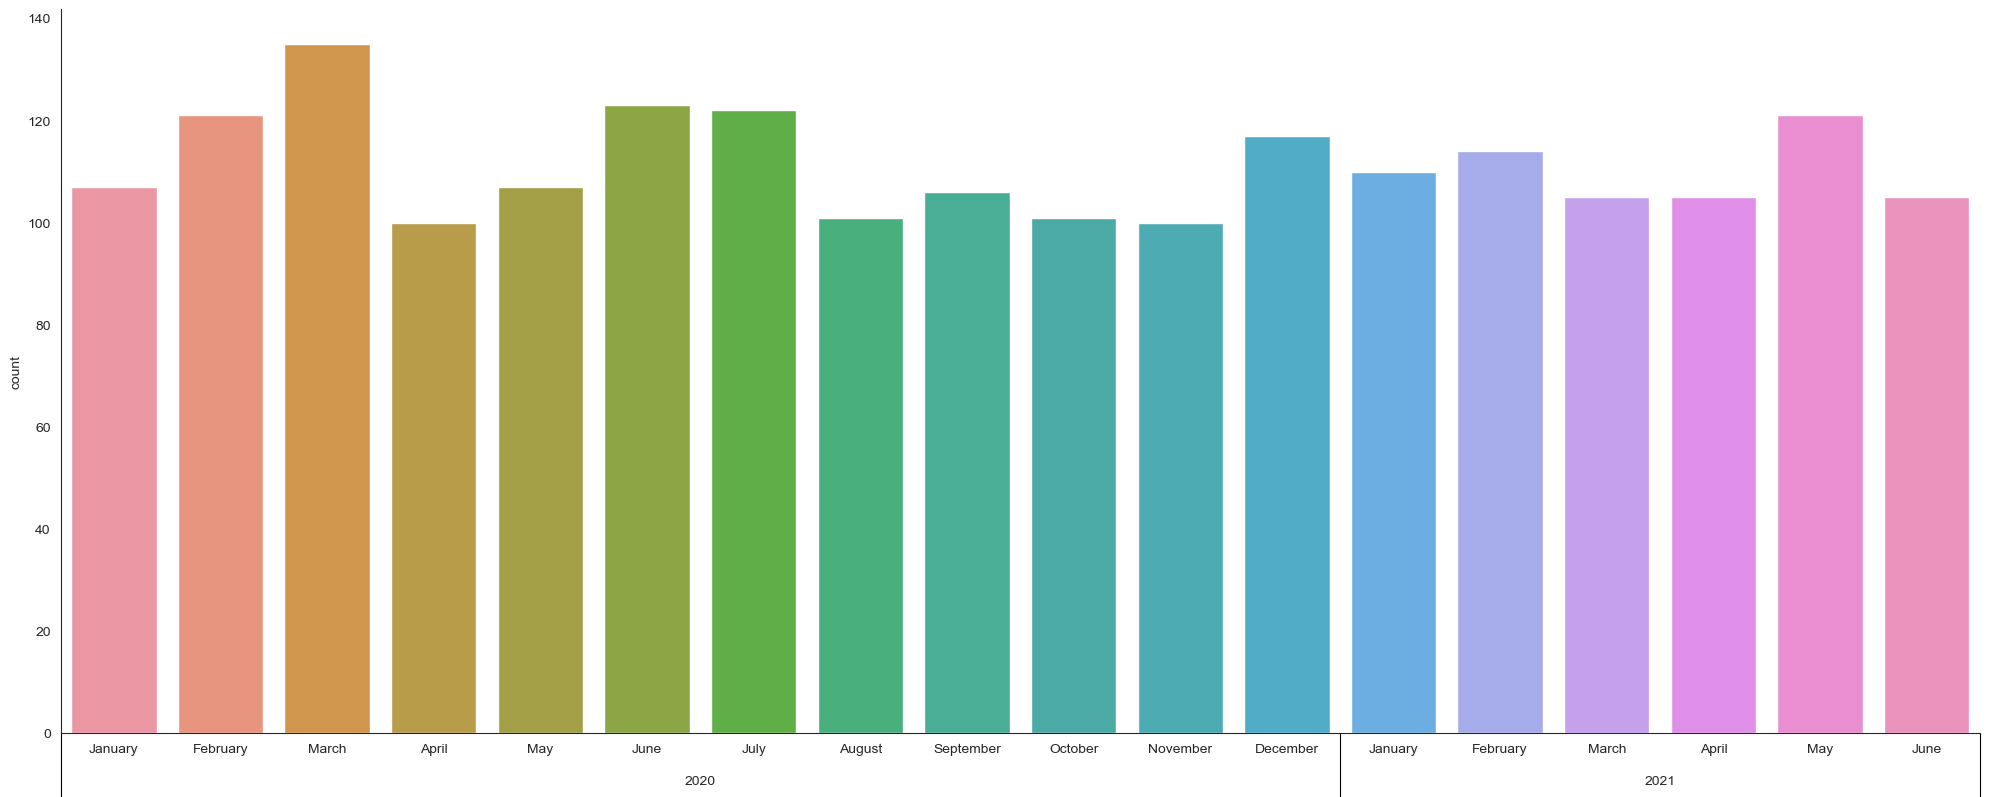

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_date1, test_date2 = '20200101', '20210630'

months = pd.date_range('2021-01-01', periods=12, freq='M').strftime('%B')
K = 2000
df = pd.DataFrame(np.random.choice(pd.date_range(test_date1, test_date2), K), columns=['Upload Date'])
df['Year'] = df['Upload Date'].dt.year
# df['Month'] = pd.Categorical(df['Upload Date'].dt.strftime('%B'), categories=months)
df['YearMonth'] = df['Upload Date'].dt.strftime('%Y%m').astype(int)
df['DocID'] = np.random.randint(100000, 200000, df.shape[0]).astype('str')
df['DocID'] = 'DOC' + df['DocID']

sns.set_style("white")
sns.set_color_codes("pastel")
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x='YearMonth', data=df, ax=ax)
sns.despine()
yearmonth_labels = [int(l.get_text()) for l in ax.get_xticklabels()]
ax.set_xticklabels([months[ym % 100 - 1] for ym in yearmonth_labels])
ax.set_xlabel('')

# calculate the positions of the borders between the years
pos = []
years = []
prev = None
for i, ym in enumerate(yearmonth_labels):
    if ym // 100 != prev:
        pos.append(i)
        prev = ym // 100
        years.append(prev)
pos.append(len(yearmonth_labels))
pos = np.array(pos) - 0.5
# vertical lines to separate the years
ax.vlines(pos, 0, -0.12, color='black', lw=0.8, clip_on=False, transform=ax.get_xaxis_transform())
# years at the center of their range
for year, pos0, pos1 in zip(years, pos[:-1], pos[1:]):
    ax.text((pos0 + pos1) / 2, -0.07, year, ha='center', clip_on=False, transform=ax.get_xaxis_transform())

ax.set_xlim(pos[0], pos[-1])
ax.set_ylim(ymin=0)
plt.tight_layout()
plt.show()

In [2]:
months

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')